# Main Quest 02 : Feature Engineering

## Project: 신용거래 이상탐지 데이터 다루기

### 2025-10-20 데이터사이언스6기 이미현

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
print('ready')

ready


In [2]:
cc_df = pd.read_csv('~/data/fraud.csv')

In [3]:
#최대 50개 컬럼까지 생략하지 않고 모두 출력

pd.set_option('display.max_columns', 50)

In [4]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


### cc_df의 컬럼명과 자료형을 확인합니다.

In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

### cc_df의 컬럼별 통계량을 확인합니다.

In [6]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [7]:
2.131124e+14

213112400000000.0

### merchant 컬럼에 포함된 값이 몇 종류인지 확인합니다.

In [8]:
#고유값 개수를 세는 매서드

cc_df['merchant'].nunique()

693

### Q. job 컬럼에 포함된 값이 몇 종류인지 확인합니다.

In [9]:
cc_df['job'].nunique()

110

### Q. cc_num 컬럼에 포함된 값이 몇 종류인지 확인합니다.

In [10]:
cc_df['cc_num'].nunique()

124

### 불필요한 컬럼들을 제거합니다.

In [11]:
#데이터.drop([], axis = 1 -> 기준을 '행'으로 , inplace = True -> 원본 데이터 프레임에 바로 변경)

cc_df.drop(['merchant','first','last','street','city','state','zip','job','trans_num','unix_time'], axis = 1, inplace= True)

### cc_num 컬럼의 값을 기준으로 정렬합니다.

In [12]:
#sort_values('') : 특정 컬럼 기준으로 데이터 정렬, 디폴트 : 오름차순 / 내림차순으로 변경 원할 경우 , ascending = False 

cc_df.sort_values('cc_num')

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
378075,2020-08-05 17:03:19,503874407318,shopping_pos,7.77,M,29.5894,-98.5201,1595797,1975-12-28,30.014539,-98.426767,0
230588,2019-12-20 22:21:36,503874407318,health_fitness,72.06,M,29.5894,-98.5201,1595797,1975-12-28,29.260487,-97.961746,0
421413,2020-10-10 12:39:32,503874407318,misc_pos,4.78,M,29.5894,-98.5201,1595797,1975-12-28,29.116928,-99.258936,0
468378,2020-12-13 15:55:44,503874407318,kids_pets,84.56,M,29.5894,-98.5201,1595797,1975-12-28,29.994537,-98.441297,0
345085,2020-06-22 23:52:06,503874407318,entertainment,24.33,M,29.5894,-98.5201,1595797,1975-12-28,29.277168,-98.239289,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53631,2019-04-14 16:57:31,4956828990005111019,entertainment,27.41,M,40.6747,-74.2239,124967,1980-12-21,39.888460,-74.151440,0
485223,2020-12-27 14:14:40,4956828990005111019,home,28.52,M,40.6747,-74.2239,124967,1980-12-21,41.068207,-75.015316,0
264968,2020-02-15 13:32:48,4956828990005111019,shopping_pos,2.95,M,40.6747,-74.2239,124967,1980-12-21,41.435438,-73.839008,0
63475,2019-04-30 17:45:09,4956828990005111019,shopping_pos,7.28,M,40.6747,-74.2239,124967,1980-12-21,41.149072,-75.143152,0


In [13]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   category               491134 non-null  object 
 3   amt                    491134 non-null  float64
 4   gender                 491134 non-null  object 
 5   lat                    491134 non-null  float64
 6   long                   491134 non-null  float64
 7   city_pop               491134 non-null  int64  
 8   dob                    491134 non-null  object 
 9   merch_lat              491134 non-null  float64
 10  merch_long             491134 non-null  float64
 11  is_fraud               491134 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 45.0+ MB


## 구매금액의 z-score 계산하기

---
> ##### z-score 계산을 위한 실습용 데이터입니다.

In [14]:
temp = pd.DataFrame({'a': [10,20,30,20,10,200], 'b': [100,300,200,150,250,200], 'c': [10, 500, 20, 250, 25, 200]})

In [15]:
temp

,a,b,c
0,10,100,10
1,20,300,500
2,30,200,20
3,20,150,250
4,10,250,25
5,200,200,200


##### temp 데이터의 컬럼별 평균을 계산합니다.

In [16]:
temp.mean()

a     48.333333
b    200.000000
c    167.500000
dtype: float64

##### temp 데이터의 컬럼별 표준편차를 계산합니다.

In [17]:
temp.std()

a     74.677083
b     70.710678
c    192.503247
dtype: float64

##### 각각의 데이터에 대해 a 컬럼의 z-score를 계산합니다. <br> (data - mean) / std

In [18]:
#z-score = (data - mean) / std
#어떤 데이터 값이 평균으로부터 얼마나 떨어져 있는지 표준편차 단위로 나타낸 값
#결과 값 = 0 : 평균과 같은 값
#결과 값 > 0 : 평균보다 큰 값
#결과 값 < 0 : 평균보다 작은 값
#절대값이 클수록 평균에서 멀리 떨어진 값 = 이상치(outlier) 가능성이 있음

(temp['a'] - temp['a'].mean()) / temp['a'].std()

0   -0.513321
1   -0.379411
2   -0.245501
3   -0.379411
4   -0.513321
5    2.030967
Name: a, dtype: float64

##### Q. 각각의 데이터에 대해 b 컬럼의 z-score를 계산합니다.

In [19]:
(temp['b'] - temp['b'].mean()) / temp['b'].std()

0   -1.414214
1    1.414214
2    0.000000
3   -0.707107
4    0.707107
5    0.000000
Name: b, dtype: float64

##### Q. 각각의 데이터에 대해 c 컬럼의 z-score를 계산합니다.

In [20]:
(temp['c'] - temp['c'].mean()) / temp['c'].std()

0   -0.818168
1    1.727244
2   -0.766221
3    0.428564
4   -0.740247
5    0.168828
Name: c, dtype: float64

---

### cc_num 컬럼의 값마다 데이터 개수를 계산합니다.

In [21]:
cc_df['cc_num'].value_counts()

#각 행별 카드번호로 발생한 거래횟수
#행의 길이가 총 124개 = 총 124개의 고유 카드번호 존재함 확인
#다수의 거래가 사기인지 아닌지 판별 필요해보임

6538441737335434    4392
30270432095985      4392
4364010865167176    4386
4642255475285942    4386
6538891242532018    4386
                    ... 
36913587729122      3641
4681601008538160    3638
30551643947183      3638
4005676619255478    3638
3511378610369890    3628
Name: cc_num, Length: 124, dtype: int64

### cc_num 컬럼의 값마다 amt의 평균, 표준편차를 계산하여 amt_info에 저장합니다.

In [22]:
cc_df.groupby('cc_num')['amt'].agg(['mean', 'std']).reset_index()

#reset_index: 기존 인덱스를 삭제하고 0부터 시작하는 새 인덱스를 만든다 
#-> 평균,표준편차 구한 데이터의 컬럼 이름 재설정으로 분석용 테이블을 생성하기 위함

,cc_num,mean,std
0,503874407318,60.253406,127.265783
1,567868110212,83.442558,117.303828
2,571365235126,59.392974,134.289959
3,581686439828,58.578675,149.804992
4,630423337322,56.078113,159.201852
...,...,...,...
119,4792627764422477317,84.135134,107.316736
120,4797297220948468262,56.313583,247.931817
121,4861310130652566408,85.805306,130.998089
122,4906628655840914250,54.243453,154.767184


In [23]:
amt_info = cc_df.groupby('cc_num')['amt'].agg(['mean', 'std']).reset_index()
amt_info

,cc_num,mean,std
0,503874407318,60.253406,127.265783
1,567868110212,83.442558,117.303828
2,571365235126,59.392974,134.289959
3,581686439828,58.578675,149.804992
4,630423337322,56.078113,159.201852
...,...,...,...
119,4792627764422477317,84.135134,107.316736
120,4797297220948468262,56.313583,247.931817
121,4861310130652566408,85.805306,130.998089
122,4906628655840914250,54.243453,154.767184


In [24]:
amt_info.to_pickle('./amt_info.pkl')

#to_pickle : Python pickle 형식으로 직렬화(Serialization)해서 파일로 저장하는 매서드
#('~') : 저장할 파일 경로와 이름

#직렬화
#메모리 안의 객체(데이터 구조, 변수, 리스트, 딕셔너리 등)를
#파일이나 네트워크로 전달할 수 있는 연속적인 바이트(byte) 형태로 변환하는 과정
#즉, Python 객체를 저장하거나 전송 가능한 형태로 바꾸는 것

#pickle 파일로 저장 → Python에서 다시 원래 DataFrame 그대로 복원 가능
#CSV보다 속도가 빠르고, 데이터 타입 정보 유지 가능

### Q. cc_num 컬럼을 기준으로, cc_df와 amt_info 데이터를 합쳐서 cc_df에 저장합니다. <br> (left merge를 수행합니다.)

In [25]:
cc_df.merge(amt_info, on = 'cc_num', how = 'left')

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,59.858059,132.138802
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,87.328067,113.454416
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,64.317839,174.739042
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,90.747123,165.470881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,34.853497,-78.664158,0,87.442772,129.935554
491130,2020-12-31 23:56:57,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,35.008839,-81.475156,0,58.181297,188.339282
491131,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,50.452289,168.361122
491132,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,88.704297,119.948793


In [26]:
cc_df = cc_df.merge(amt_info, on = 'cc_num', how = 'left')
cc_df

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,59.858059,132.138802
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,87.328067,113.454416
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,64.317839,174.739042
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,90.747123,165.470881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,34.853497,-78.664158,0,87.442772,129.935554
491130,2020-12-31 23:56:57,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,35.008839,-81.475156,0,58.181297,188.339282
491131,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,50.452289,168.361122
491132,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,88.704297,119.948793


In [29]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,59.858059,132.138802
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,87.328067,113.454416
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,64.317839,174.739042
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,90.747123,165.470881


### Q. 결제금액(amt)의 z-score를 계산하여 amt_z 컬럼에 저장합니다. <br> 평균: mean, 표준편차: std

In [30]:
(cc_df['amt'] - cc_df['mean']) / cc_df['std']

0         0.321302
1        -0.114637
2        -0.361802
3        -0.001304
4        -0.393828
            ...   
491129    0.360311
491130   -0.173577
491131    0.364619
491132   -0.015209
491133   -0.152588
Length: 491134, dtype: float64

In [31]:
cc_df['amt_z'] = (cc_df['amt'] - cc_df['mean']) / cc_df['std']

### 사기 거래 데이터(is_fraud=1)를 확인합니다.

In [32]:
cc_df['is_fraud'] == 1

0         False
1         False
2         False
3         False
4         False
          ...  
491129    False
491130    False
491131    False
491132    False
491133    False
Name: is_fraud, Length: 491134, dtype: bool

In [33]:
cc_df[cc_df['is_fraud'] == 1]

#총 1244개

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std,amt_z
4794,2019-01-12 00:59:01,581686439828,gas_transport,11.73,M,41.5205,-80.0573,5507,1973-07-28,41.947427,-79.796264,1,58.578675,149.804992,-0.312731
4816,2019-01-12 03:48:07,581686439828,grocery_pos,328.68,M,41.5205,-80.0573,5507,1973-07-28,42.148618,-79.398595,1,58.578675,149.804992,1.803020
4979,2019-01-12 15:46:10,581686439828,food_dining,120.58,M,41.5205,-80.0573,5507,1973-07-28,42.470024,-80.126576,1,58.578675,149.804992,0.413880
5073,2019-01-12 19:53:59,581686439828,shopping_net,1081.35,M,41.5205,-80.0573,5507,1973-07-28,42.455406,-79.521640,1,58.578675,149.804992,6.827351
5124,2019-01-12 22:44:05,581686439828,shopping_net,776.70,M,41.5205,-80.0573,5507,1973-07-28,40.680209,-79.099101,1,58.578675,149.804992,4.793708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,grocery_pos,358.24,F,48.2777,-112.8456,743,1972-05-04,47.526202,-113.643313,1,52.537867,106.113023,2.880911
477847,2020-12-21 02:36:03,4716561796955522,shopping_net,859.12,F,48.2777,-112.8456,743,1972-05-04,48.272348,-112.328075,1,52.537867,106.113023,7.601161
479296,2020-12-21 22:38:38,4716561796955522,home,209.84,F,48.2777,-112.8456,743,1972-05-04,49.173669,-112.698767,1,52.537867,106.113023,1.482402
479305,2020-12-21 22:42:11,4716561796955522,food_dining,123.58,F,48.2777,-112.8456,743,1972-05-04,48.913048,-113.214921,1,52.537867,106.113023,0.669495


### z-score 계산이 완료되었으니 mean, std 컬럼을 제거합니다.

In [34]:
cc_df.drop(['mean', 'std'], axis = 1)

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,34.853497,-78.664158,0,0.360311
491130,2020-12-31 23:56:57,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,35.008839,-81.475156,0,-0.173577
491131,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619
491132,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209


In [35]:
cc_df.drop(['mean', 'std'], axis = 1, inplace = True)

### cc_num, category 컬럼의 값마다 결제금액(amt)의 평균, 표준편차를 계산하여 cat_info에 저장합니다.


In [36]:
cc_df.groupby(['cc_num', 'category'])['amt'].agg(['mean', 'std']).reset_index()

#cc_num, category 별 amt(거래 금액)의 평균, 표준편차를 계산하는 과정
#평균 거래 금액과 변동성을 계산하여 같은 카드번호(cc_num)에서 평소보다 큰 거래 금액을 탐지하기 위함

#groupby 후에는 cc_num과 category가 인덱스로 설정됨
#reset_index()로 일반 컬럼으로 되돌려서 merge나 다른 연산에 사용 가능하게 함

,cc_num,category,mean,std
0,503874407318,entertainment,73.282418,103.050402
1,503874407318,food_dining,38.712305,46.548436
2,503874407318,gas_transport,68.457820,14.730440
3,503874407318,grocery_net,48.931302,18.736252
4,503874407318,grocery_pos,61.987806,23.449569
...,...,...,...,...
1731,4956828990005111019,misc_pos,74.177012,168.341518
1732,4956828990005111019,personal_care,35.379382,44.082579
1733,4956828990005111019,shopping_net,70.019115,239.350164
1734,4956828990005111019,shopping_pos,45.988976,174.986921


In [37]:
cat_info = cc_df.groupby(['cc_num', 'category'])['amt'].agg(['mean', 'std']).reset_index()

In [38]:
cat_info

,cc_num,category,mean,std
0,503874407318,entertainment,73.282418,103.050402
1,503874407318,food_dining,38.712305,46.548436
2,503874407318,gas_transport,68.457820,14.730440
3,503874407318,grocery_net,48.931302,18.736252
4,503874407318,grocery_pos,61.987806,23.449569
...,...,...,...,...
1731,4956828990005111019,misc_pos,74.177012,168.341518
1732,4956828990005111019,personal_care,35.379382,44.082579
1733,4956828990005111019,shopping_net,70.019115,239.350164
1734,4956828990005111019,shopping_pos,45.988976,174.986921


In [39]:
#cat_info 파일을 pickle 형태로 저장

cat_info.to_pickle('./cat_info.pkl')

### Q. cc_num 컬럼을 기준으로, cc_df와 cat_info 데이터를 합쳐서 cc_df에 저장합니다. <br> (left merge를 수행합니다.)

In [40]:
#cat_info는 'cc_num'과 'category' 기준으로 생성되었기 때문에, 두 컬럼을 기준으로 cat_info의 mean, std 열을 merge

cc_df.merge(cat_info, on = ['cc_num', 'category'], how = 'left')

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,mean,std
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,99.637224,23.904424
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,60.694144,24.513316
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,60.427269,19.558574
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,59.145831,23.345746
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,86.794025,106.330185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,34.853497,-78.664158,0,0.360311,58.958771,51.896818
491130,2020-12-31 23:56:57,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,35.008839,-81.475156,0,-0.173577,66.667245,319.508780
491131,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,50.923503,52.341751
491132,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,63.856707,52.309370


In [41]:
cc_df = cc_df.merge(cat_info, on = ['cc_num', 'category'], how = 'left')

### Q. 결제금액(amt)의 z-score를 계산하여 cat_amt_z 컬럼에 저장합니다. <br> 평균: mean, 표준편차: std

In [42]:
(cc_df['amt'] - cc_df['mean']) / cc_df['std']

0         0.317631
1        -0.652060
2        -0.723328
3         0.211780
4        -0.575698
            ...   
491129    1.450980
491130   -0.128877
491131    1.163822
491132    0.440137
491133   -0.380698
Length: 491134, dtype: float64

In [43]:
cc_df['cat_amt_z'] = (cc_df['amt'] - cc_df['mean']) / cc_df['std']

### z-score 계산이 완료되었으니 mean, std 컬럼을 제거합니다.

In [44]:
cc_df.drop(['mean', 'std'], axis = 1, inplace = True)

In [45]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698


In [47]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698


# 결제 시간 관련 feature 분석

In [48]:
# Q. trans_date_trans_time 컬럼에서 시간 값을 추출하여 hour 컬럼에 저장합니다.
# (힌트: datetime 자료형을 이용합니다.)

#pd.to_datetime() : 문자열(object)로된 날짜/시간 데이터를 datatime 자료형으로 변환
# #   Column                 Non-Null Count   Dtype  
#---  ------                 --------------   -----  
# 0   trans_date_trans_time  491134 non-null  object 

pd.to_datetime(cc_df['trans_date_trans_time'])

0        2019-01-01 00:00:44
1        2019-01-01 00:12:34
2        2019-01-01 00:17:16
3        2019-01-01 00:20:15
4        2019-01-01 00:23:41
                 ...        
491129   2020-12-31 23:56:48
491130   2020-12-31 23:56:57
491131   2020-12-31 23:59:09
491132   2020-12-31 23:59:15
491133   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 491134, dtype: datetime64[ns]

In [49]:
cc_df['trans_date_trans_time'] = pd.to_datetime(cc_df['trans_date_trans_time'])

In [50]:
cc_df['trans_date_trans_time']

#dtype이 object -> datetime64로 변경됨 확인

0        2019-01-01 00:00:44
1        2019-01-01 00:12:34
2        2019-01-01 00:17:16
3        2019-01-01 00:20:15
4        2019-01-01 00:23:41
                 ...        
491129   2020-12-31 23:56:48
491130   2020-12-31 23:56:57
491131   2020-12-31 23:59:09
491132   2020-12-31 23:59:15
491133   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 491134, dtype: datetime64[ns]

In [51]:
#hour 시간값 추출하기

cc_df['trans_date_trans_time'].dt.hour

#dt.hour : datetime 객체에서 hour만 추출하여 0~23 숫자 형태로 반환
#dtype이 int64인 점 확인

0          0
1          0
2          0
3          0
4          0
          ..
491129    23
491130    23
491131    23
491132    23
491133    23
Name: trans_date_trans_time, Length: 491134, dtype: int64

In [52]:
#hour 컬럼에 저장
cc_df['hour'] = cc_df['trans_date_trans_time'].dt.hour

In [53]:
cc_df.head(100)

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01 07:12:30,3511378610369890,misc_net,4.26,M,34.7789,-86.5438,190178,1973-04-01,35.036513,-87.003540,0,-0.335631,-0.371673,7
96,2019-01-01 07:23:20,6011109736646996,grocery_pos,194.98,F,34.2651,-77.8670,186140,1983-02-08,34.747884,-77.812611,0,0.827620,-0.317269,7
97,2019-01-01 07:34:46,6011893664860915,gas_transport,91.22,F,39.5994,-105.0044,320420,1975-07-31,40.062868,-105.199294,0,0.010708,1.296279,7
98,2019-01-01 07:44:56,2720433095629877,gas_transport,51.44,M,44.0575,-69.9656,3224,1997-08-22,43.243592,-69.994459,0,0.003005,-0.519306,7


In [54]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491134 entries, 0 to 491133
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   category               491134 non-null  object        
 3   amt                    491134 non-null  float64       
 4   gender                 491134 non-null  object        
 5   lat                    491134 non-null  float64       
 6   long                   491134 non-null  float64       
 7   city_pop               491134 non-null  int64         
 8   dob                    491134 non-null  object        
 9   merch_lat              491134 non-null  float64       
 10  merch_long             491134 non-null  float64       
 11  is_fraud               491134 non-null  int64         
 12  amt_z                  491134 non-null  floa

### 결제시간을 morning, afternoon, night, evening으로 분류하기 위해 함수를 정의합니다.


In [55]:
def hour_func(x):
    if (x >= 6) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 18):
        return 'afternoon'
    elif (x >= 18) & (x < 23):
        return 'evening'
    else:
        return 'night'
    
#LMS에 기재된 evening과 night의 기준이 일반적인 개념과 상이하여
#18시 이후 ~ 23시 전 : evening
#23시 이후 ~ 06시 전 : night 으로 코드 기준을 변경함

In [56]:
cc_df['hour'].apply(hour_func)

0         night
1         night
2         night
3         night
4         night
          ...  
491129    night
491130    night
491131    night
491132    night
491133    night
Name: hour, Length: 491134, dtype: object

In [57]:
cc_df['hour_cat'] = cc_df['hour'].apply(hour_func)

In [58]:
cc_df.tail(100)

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour,hour_cat
491034,2020-12-31 22:14:05,372509258176510,shopping_pos,158.29,F,42.9147,-83.4845,6951,1985-06-18,42.720794,-83.285057,0,0.288404,0.230375,22,evening
491035,2020-12-31 22:14:48,630423337322,shopping_net,4.42,F,48.8878,-118.2105,149,1978-06-21,49.750832,-117.291789,0,-0.324482,-0.175229,22,evening
491036,2020-12-31 22:15:27,3589255887819806,home,5.64,M,39.6991,-78.1762,3766,1984-02-14,40.528253,-78.882297,0,-0.340121,-1.080031,22,evening
491037,2020-12-31 22:16:04,3589255887819806,travel,6.30,M,39.6991,-78.1762,3766,1984-02-14,39.218282,-78.506456,0,-0.336304,-0.263522,22,evening
491038,2020-12-31 22:17:54,6011652924285713,kids_pets,3.95,F,38.2911,-92.7059,1847,1988-10-26,38.168684,-92.244802,0,-0.324567,-0.878170,22,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,34.853497,-78.664158,0,0.360311,1.450980,23,night
491130,2020-12-31 23:56:57,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,35.008839,-81.475156,0,-0.173577,-0.128877,23,night
491131,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822,23,night
491132,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137,23,night


### Q. 시간대별로 데이터 수를 계산하여 출력합니다.

In [59]:
#value_counts() : 시리즈/컬럼 내 각 값이 몇 번 나오는지 내림차순으로 정렬해 반환하는 함수

cc_df['hour_cat'].value_counts()

afternoon    176801
evening      146697
night         98662
morning       68974
Name: hour_cat, dtype: int64

In [60]:
cc_df[['hour', 'hour_cat']].value_counts()

hour  hour_cat 
15    afternoon    29690
16    afternoon    29629
23    night        29554
18    evening      29516
12    afternoon    29456
21    evening      29413
17    afternoon    29409
22    evening      29393
13    afternoon    29390
14    afternoon    29227
20    evening      29192
19    evening      29183
2     night        11654
7     morning      11578
9     morning      11562
8     morning      11536
1     night        11535
0     night        11532
3     night        11530
5     night        11495
10    morning      11486
11    morning      11419
6     morning      11393
4     night        11362
dtype: int64

### cc_num 컬럼의 값마다 amt 컬럼의 데이터 수를 계산하여 all_cnt 변수로 저장합니다.

In [61]:
cc_df.groupby('cc_num')['amt'].count().reset_index()

,cc_num,amt
0,503874407318,3655
1,567868110212,3644
2,571365235126,4374
3,581686439828,3653
4,630423337322,4362
...,...,...
119,4792627764422477317,4357
120,4797297220948468262,3653
121,4861310130652566408,3643
122,4906628655840914250,3655


In [62]:
all_cnt = cc_df.groupby('cc_num')['amt'].count().reset_index()

### cc_num, hour_cat 컬럼의 값마다 amt 컬럼의 데이터 수를 계산하여 hour_cnt 변수로 저장합니다.


In [63]:
cc_df.groupby(['cc_num', 'hour_cat'])['amt'].count().reset_index()

,cc_num,hour_cat,amt
0,503874407318,afternoon,1280
1,503874407318,evening,1080
2,503874407318,morning,558
3,503874407318,night,737
4,567868110212,afternoon,1228
...,...,...,...
491,4906628655840914250,night,800
492,4956828990005111019,afternoon,1277
493,4956828990005111019,evening,1038
494,4956828990005111019,morning,558


In [64]:
hour_cnt = cc_df.groupby(['cc_num', 'hour_cat'])['amt'].count().reset_index()

In [65]:
all_cnt.head()

,cc_num,amt
0,503874407318,3655
1,567868110212,3644
2,571365235126,4374
3,581686439828,3653
4,630423337322,4362


In [66]:
hour_cnt.head()

,cc_num,hour_cat,amt
0,503874407318,afternoon,1280
1,503874407318,evening,1080
2,503874407318,morning,558
3,503874407318,night,737
4,567868110212,afternoon,1228


### Q. cc_num 컬럼을 기준으로 hour_cnt와 all_cnt를 합칩니다. <br> (hour_cnt에서 left merge를 수행합니다.)

In [67]:
hour_cnt.merge(all_cnt, on = 'cc_num', how = 'left')

,cc_num,hour_cat,amt_x,amt_y
0,503874407318,afternoon,1280,3655
1,503874407318,evening,1080,3655
2,503874407318,morning,558,3655
3,503874407318,night,737,3655
4,567868110212,afternoon,1228,3644
...,...,...,...,...
491,4906628655840914250,night,800,3655
492,4956828990005111019,afternoon,1277,3657
493,4956828990005111019,evening,1038,3657
494,4956828990005111019,morning,558,3657


In [68]:
hour_cnt = hour_cnt.merge(all_cnt, on = 'cc_num', how = 'left')

### Q. amt_x와 amt_y 컬럼의 이름을 각각 hour_cnt, total_cnt로 변경합니다.


In [69]:
hour_cnt.rename(columns = {'amt_x' : 'hour_cnt', 'amt_y' : 'total_cnt'})

,cc_num,hour_cat,hour_cnt,total_cnt
0,503874407318,afternoon,1280,3655
1,503874407318,evening,1080,3655
2,503874407318,morning,558,3655
3,503874407318,night,737,3655
4,567868110212,afternoon,1228,3644
...,...,...,...,...
491,4906628655840914250,night,800,3655
492,4956828990005111019,afternoon,1277,3657
493,4956828990005111019,evening,1038,3657
494,4956828990005111019,morning,558,3657


In [70]:
hour_cnt.rename(columns = {'amt_x' : 'hour_cnt', 'amt_y' : 'total_cnt'}, inplace = True)

In [71]:
hour_cnt.head()

,cc_num,hour_cat,hour_cnt,total_cnt
0,503874407318,afternoon,1280,3655
1,503874407318,evening,1080,3655
2,503874407318,morning,558,3655
3,503874407318,night,737,3655
4,567868110212,afternoon,1228,3644


### Q. 전체 거래 건수(total_cnt)에 대한 시간대별 거래 건수(hour_cnt)의 비율을 계산하여 <br> hour_perc 컬럼에 저장합니다.

In [72]:
hour_cnt['hour_cnt'] / hour_cnt['total_cnt']

0      0.350205
1      0.295486
2      0.152668
3      0.201642
4      0.336992
         ...   
491    0.218878
492    0.349193
493    0.283839
494    0.152584
495    0.214383
Length: 496, dtype: float64

In [73]:
#어떤 데이터셋에 merge 할 것인지 변수 -> 데이터셋을 만들 때 잘 구분하기!

hour_cnt['hour_perc'] = hour_cnt['hour_cnt'] / hour_cnt['total_cnt']

In [74]:
hour_cnt.head(10)

,cc_num,hour_cat,hour_cnt,total_cnt,hour_perc
0,503874407318,afternoon,1280,3655,0.350205
1,503874407318,evening,1080,3655,0.295486
2,503874407318,morning,558,3655,0.152668
3,503874407318,night,737,3655,0.201642
4,567868110212,afternoon,1228,3644,0.336992
5,567868110212,evening,1067,3644,0.292810
6,567868110212,morning,529,3644,0.145170
7,567868110212,night,820,3644,0.225027
8,571365235126,afternoon,1523,4374,0.348194
9,571365235126,evening,1257,4374,0.287380


In [75]:
hour_cnt.tail(10)

,cc_num,hour_cat,hour_cnt,total_cnt,hour_perc
486,4861310130652566408,morning,529,3643,0.145210
487,4861310130652566408,night,781,3643,0.214384
488,4906628655840914250,afternoon,1282,3655,0.350752
489,4906628655840914250,evening,1073,3655,0.293570
490,4906628655840914250,morning,500,3655,0.136799
491,4906628655840914250,night,800,3655,0.218878
492,4956828990005111019,afternoon,1277,3657,0.349193
493,4956828990005111019,evening,1038,3657,0.283839
494,4956828990005111019,morning,558,3657,0.152584
495,4956828990005111019,night,784,3657,0.214383


In [76]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour,hour_cat
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0,night
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0,night
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0,night
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0,night
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0,night


In [77]:
hour_cnt = hour_cnt[['cc_num','hour_cat','hour_perc']]

In [78]:
hour_cnt.to_pickle('./hour_cnt.pkl')

### Q. cc_num, hour_cat 컬럼을 기준으로 cc_df와 hour_cnt 데이터를 합칩니다. <br> (cc_df에서 left merge를 수행합니다.)

In [79]:
cc_df.merge(hour_cnt, on = ['cc_num', 'hour_cat'], how = 'left')

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour,hour_cat,hour_perc
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0,night,0.196470
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0,night,0.214383
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0,night,0.217252
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0,night,0.213600
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0,night,0.202882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,34.853497,-78.664158,0,0.360311,1.450980,23,night,0.209201
491130,2020-12-31 23:56:57,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,35.008839,-81.475156,0,-0.173577,-0.128877,23,night,0.207534
491131,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822,23,night,0.160339
491132,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137,23,night,0.218022


In [80]:
cc_df = cc_df.merge(hour_cnt, on = ['cc_num', 'hour_cat'], how = 'left')

In [81]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour,hour_cat,hour_perc
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0,night,0.196470
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0,night,0.214383
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0,night,0.217252
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0,night,0.213600
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0,night,0.202882


### 시간 관련 feature 분석이 완료되었으므로 불필요해진 컬럼들을 제거합니다.

In [82]:
cc_df.drop(['trans_date_trans_time', 'hour', 'hour_cat'], axis =1 , inplace = True)

In [83]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour_perc
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0.196470
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0.214383
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0.217252
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0.213600
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0.202882


In [84]:
cc_df

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour_perc
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0.196470
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0.214383
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0.217252
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0.213600
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0.202882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,34.853497,-78.664158,0,0.360311,1.450980,0.209201
491130,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,35.008839,-81.475156,0,-0.173577,-0.128877,0.207534
491131,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822,0.160339
491132,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137,0.218022


# 거리 관련 feature 분석

### 거리 계산에 필요한 geopy 라이브러리를 설치합니다.

In [85]:
!pip install geopy

In [86]:
from geopy.distance import distance

### 이렇게 위도와 경도 값으로 두 지점 사이의 거리를 구할 수 있습니다.

In [87]:
distance((48.8878, -118.2105), (49.159047, -118.186462)).km

30.216618410409005

### 고객의 위치와 상점의 위치 사이의 거리를 계산하여 distance 컬럼에 저장합니다. <br> (모든 데이터가 계산되므로 실행 시간이 오래 걸릴 수 있습니다.)

In [88]:
cc_df['distance'] = cc_df.apply(lambda x: distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis = 1)

In [89]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour_perc,distance
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0.196470,30.216618
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0.214383,84.714605
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0.217252,67.768167
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0.213600,22.322745
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0.202882,79.398244


In [90]:
from datetime import datetime

### 데이터 10000개만 계산해도 시간이 이렇게 걸립니다.

In [91]:
start_time =  datetime.now()
cc_df.head(10000).apply(lambda x: distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis = 1)
datetime.now() - start_time

datetime.timedelta(seconds=1, microseconds=846735)

In [92]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour_perc,distance
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0.196470,30.216618
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0.214383,84.714605
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0.217252,67.768167
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0.213600,22.322745
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0.202882,79.398244


### Q. cc_num 컬럼의 값마다 distance의 평균, 표준편차를 계산하여 dist_info 변수에 저장합니다.

In [93]:
cc_df.groupby('cc_num')['distance'].agg(['mean', 'std']).reset_index()

#mean : 카드번호별 평균 이동 거리
#std : 카드번호별 평균 이동 거리에서 얼마나 데이터가 떨어져 있는지 = 거리 변동성

,cc_num,mean,std
0,503874407318,79.746738,29.741044
1,567868110212,79.356969,30.524201
2,571365235126,73.651715,28.863007
3,581686439828,74.428143,28.605102
4,630423337322,71.656621,28.090646
...,...,...,...
119,4792627764422477317,75.499945,29.146824
120,4797297220948468262,75.630035,29.148428
121,4861310130652566408,78.977581,29.793035
122,4906628655840914250,81.148111,30.293827


In [94]:
dist_info = cc_df.groupby('cc_num')['distance'].agg(['mean', 'std']).reset_index()

In [95]:
dist_info.to_pickle('./dist_info.pkl')

### Q. cc_num 컬럼을 기준으로 cc_df와 dist_info 데이터를 합칩니다. <br> (cc_df에서 left merge를 수행합니다.)

#### 주의사항 : 결과값에 대해서 shape문을 출력했을때 <br> row가 200만개 이상으로 잡힌다면 잘못 merge되었습니다! <br> 이 경우 LMS 초기화를 진행하고 코드를 수정하고 첫 코드블럭부터 실행해주세요!

In [96]:
cc_df.merge(dist_info, on = 'cc_num', how = 'left')

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour_perc,distance,mean,std
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0.196470,30.216618,71.656621,28.090646
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0.214383,84.714605,74.811123,28.675031
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0.217252,67.768167,75.617531,28.784606
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0.213600,22.322745,74.706461,28.711493
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0.202882,79.398244,79.334924,29.620117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,34.853497,-78.664158,0,0.360311,1.450980,0.209201,98.043837,77.251486,29.270739
491130,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,35.008839,-81.475156,0,-0.173577,-0.128877,0.207534,127.240424,77.491795,29.899826
491131,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822,0.160339,100.023736,79.172599,30.051452
491132,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137,0.218022,80.887812,72.656420,28.552151


In [97]:
cc_df = cc_df.merge(dist_info, on = 'cc_num', how = 'left')

In [98]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour_perc,distance,mean,std
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0.196470,30.216618,71.656621,28.090646
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0.214383,84.714605,74.811123,28.675031
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0.217252,67.768167,75.617531,28.784606
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0.213600,22.322745,74.706461,28.711493
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0.202882,79.398244,79.334924,29.620117


### Q. distance 값의 z-score를 계산하여 dist_z 컬럼에 저장합니다.

In [99]:
(cc_df['distance'] - cc_df['mean']) / cc_df['std']

0        -1.475224
1         0.345370
2        -0.272693
3        -1.824486
4         0.002138
            ...   
491129    0.710346
491130    1.663843
491131    0.693848
491132    0.288293
491133   -0.159439
Length: 491134, dtype: float64

In [100]:
cc_df['dist_z'] = (cc_df['distance'] - cc_df['mean']) / cc_df['std']

In [101]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour_perc,distance,mean,std,dist_z
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0.196470,30.216618,71.656621,28.090646,-1.475224
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0.214383,84.714605,74.811123,28.675031,0.345370
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0.217252,67.768167,75.617531,28.784606,-0.272693
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0.213600,22.322745,74.706461,28.711493,-1.824486
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0.202882,79.398244,79.334924,29.620117,0.002138


In [102]:
cc_df

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,hour_perc,distance,mean,std,dist_z
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0.196470,30.216618,71.656621,28.090646,-1.475224
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0.214383,84.714605,74.811123,28.675031,0.345370
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0.217252,67.768167,75.617531,28.784606,-0.272693
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0.213600,22.322745,74.706461,28.711493,-1.824486
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0.202882,79.398244,79.334924,29.620117,0.002138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,34.853497,-78.664158,0,0.360311,1.450980,0.209201,98.043837,77.251486,29.270739,0.710346
491130,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,35.008839,-81.475156,0,-0.173577,-0.128877,0.207534,127.240424,77.491795,29.899826,1.663843
491131,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822,0.160339,100.023736,79.172599,30.051452,0.693848
491132,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137,0.218022,80.887812,72.656420,28.552151,0.288293


### 불필요해진 컬럼들을 제거합니다.

In [103]:
cc_df.drop(['lat','long','merch_lat','merch_long','mean','std'], axis = 1, inplace = True)

In [104]:
cc_df.head()

,cc_num,category,amt,gender,city_pop,dob,is_fraud,amt_z,cat_amt_z,hour_perc,distance,dist_z
0,630423337322,grocery_pos,107.23,F,149,1978-06-21,0,0.321302,0.317631,0.196470,30.216618,-1.475224
1,4956828990005111019,grocery_pos,44.71,M,124967,1980-12-21,0,-0.114637,-0.652060,0.214383,84.714605,0.345370
2,180048185037117,grocery_net,46.28,F,71485,1974-07-19,0,-0.361802,-0.723328,0.217252,67.768167,-0.272693
3,374930071163758,grocery_pos,64.09,M,31515,1971-11-05,0,-0.001304,0.211780,0.213600,22.322745,-1.824486
4,2712209726293386,misc_pos,25.58,F,378909,1977-02-22,0,-0.393828,-0.575698,0.202882,79.398244,0.002138


# 나이 feature 만들어보기

### Q. dob 컬럼에서 연도 값만 추출하여 dob 컬럼에 저장합니다.

In [105]:
cc_df.info()

# #   Column     Non-Null Count   Dtype  
# 5   dob        491134 non-null  object 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491134 entries, 0 to 491133
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cc_num     491134 non-null  int64  
 1   category   491134 non-null  object 
 2   amt        491134 non-null  float64
 3   gender     491134 non-null  object 
 4   city_pop   491134 non-null  int64  
 5   dob        491134 non-null  object 
 6   is_fraud   491134 non-null  int64  
 7   amt_z      491134 non-null  float64
 8   cat_amt_z  491134 non-null  float64
 9   hour_perc  491134 non-null  float64
 10  distance   491134 non-null  float64
 11  dist_z     491134 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 48.7+ MB


In [106]:
pd.to_datetime(cc_df['dob'])

#object -> datetime64로 dtype 변경된 점 확인

0        1978-06-21
1        1980-12-21
2        1974-07-19
3        1971-11-05
4        1977-02-22
            ...    
491129   1983-02-08
491130   1984-06-03
491131   1999-12-27
491132   1981-11-29
491133   1993-05-10
Name: dob, Length: 491134, dtype: datetime64[ns]

In [107]:
#datatime으로 변경 후, year만 뽑아오기 -> .dt.year

pd.to_datetime(cc_df['dob']).dt.year

0         1978
1         1980
2         1974
3         1971
4         1977
          ... 
491129    1983
491130    1984
491131    1999
491132    1981
491133    1993
Name: dob, Length: 491134, dtype: int64

In [108]:
cc_df['dob'] = pd.to_datetime(cc_df['dob']).dt.year

In [109]:
cc_df['dob']

0         1978
1         1980
2         1974
3         1971
4         1977
          ... 
491129    1983
491130    1984
491131    1999
491132    1981
491133    1993
Name: dob, Length: 491134, dtype: int64

# 범주형 데이터의 one-hot encoding

### 범주형 컬럼 'category'에 몇 종류의 값이 있는지 확인해봅시다.

In [110]:
cc_df['category'].nunique()

14

### Q. cc_df의 범주형 데이터에 원-핫 인코딩을 적용합니다. <br> (drop_first 옵션은 True로 설정합니다.)

In [111]:
#원핫인코딩 : pd.get_dummies(데이터, columns = [''], drop_first = True)
#drop_first = True : 첫번째 범주를 제거하여 다중공선성 방지를 위함

pd.get_dummies(cc_df, columns = ['category'], drop_first = True)

,cc_num,amt,gender,city_pop,dob,is_fraud,amt_z,cat_amt_z,hour_perc,distance,dist_z,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,630423337322,107.23,F,149,1978,0,0.321302,0.317631,0.196470,30.216618,-1.475224,0,0,0,1,0,0,0,0,0,0,0,0,0
1,4956828990005111019,44.71,M,124967,1980,0,-0.114637,-0.652060,0.214383,84.714605,0.345370,0,0,0,1,0,0,0,0,0,0,0,0,0
2,180048185037117,46.28,F,71485,1974,0,-0.361802,-0.723328,0.217252,67.768167,-0.272693,0,0,1,0,0,0,0,0,0,0,0,0,0
3,374930071163758,64.09,M,31515,1971,0,-0.001304,0.211780,0.213600,22.322745,-1.824486,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2712209726293386,25.58,F,378909,1977,0,-0.393828,-0.575698,0.202882,79.398244,0.002138,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,134.26,F,186140,1983,0,0.360311,1.450980,0.209201,98.043837,0.710346,0,0,0,0,0,1,0,0,0,0,0,0,0
491130,213112402583773,25.49,F,1523,1984,0,-0.173577,-0.128877,0.207534,127.240424,1.663843,0,0,0,0,0,0,0,0,0,0,0,1,0
491131,3556613125071656,111.84,M,28739,1999,0,0.364619,1.163822,0.160339,100.023736,0.693848,0,0,0,0,0,0,1,0,0,0,0,0,0
491132,6011724471098086,86.88,F,3684,1981,0,-0.015209,0.440137,0.218022,80.887812,0.288293,0,0,0,0,0,0,1,0,0,0,0,0,0


In [112]:
#저장
cc_df = pd.get_dummies(cc_df, columns = ['category'], drop_first = True)

In [113]:
cc_df.head()

,cc_num,amt,gender,city_pop,dob,is_fraud,amt_z,cat_amt_z,hour_perc,distance,dist_z,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,630423337322,107.23,F,149,1978,0,0.321302,0.317631,0.196470,30.216618,-1.475224,0,0,0,1,0,0,0,0,0,0,0,0,0
1,4956828990005111019,44.71,M,124967,1980,0,-0.114637,-0.652060,0.214383,84.714605,0.345370,0,0,0,1,0,0,0,0,0,0,0,0,0
2,180048185037117,46.28,F,71485,1974,0,-0.361802,-0.723328,0.217252,67.768167,-0.272693,0,0,1,0,0,0,0,0,0,0,0,0,0
3,374930071163758,64.09,M,31515,1971,0,-0.001304,0.211780,0.213600,22.322745,-1.824486,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2712209726293386,25.58,F,378909,1977,0,-0.393828,-0.575698,0.202882,79.398244,0.002138,0,0,0,0,0,0,0,0,1,0,0,0,0


### 이제 불필요해진 cc_num 컬럼을 제거합니다.

In [114]:
cc_df.drop('cc_num', axis = 1, inplace = True)

In [115]:
cc_df

,amt,gender,city_pop,dob,is_fraud,amt_z,cat_amt_z,hour_perc,distance,dist_z,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,107.23,F,149,1978,0,0.321302,0.317631,0.196470,30.216618,-1.475224,0,0,0,1,0,0,0,0,0,0,0,0,0
1,44.71,M,124967,1980,0,-0.114637,-0.652060,0.214383,84.714605,0.345370,0,0,0,1,0,0,0,0,0,0,0,0,0
2,46.28,F,71485,1974,0,-0.361802,-0.723328,0.217252,67.768167,-0.272693,0,0,1,0,0,0,0,0,0,0,0,0,0
3,64.09,M,31515,1971,0,-0.001304,0.211780,0.213600,22.322745,-1.824486,0,0,0,1,0,0,0,0,0,0,0,0,0
4,25.58,F,378909,1977,0,-0.393828,-0.575698,0.202882,79.398244,0.002138,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,134.26,F,186140,1983,0,0.360311,1.450980,0.209201,98.043837,0.710346,0,0,0,0,0,1,0,0,0,0,0,0,0
491130,25.49,F,1523,1984,0,-0.173577,-0.128877,0.207534,127.240424,1.663843,0,0,0,0,0,0,0,0,0,0,0,1,0
491131,111.84,M,28739,1999,0,0.364619,1.163822,0.160339,100.023736,0.693848,0,0,0,0,0,0,1,0,0,0,0,0,0
491132,86.88,F,3684,1981,0,-0.015209,0.440137,0.218022,80.887812,0.288293,0,0,0,0,0,0,1,0,0,0,0,0,0


# 시각화 연습

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

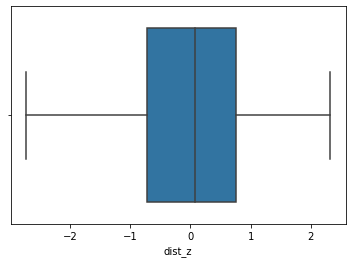

In [117]:
#거리 z-score 박스 플롯
#x축: 거리 z-score
#outlier가 많으면 사기 거래나 비정상적인 이동 패턴을 의심해야 함

sns.boxplot(x=cc_df['dist_z'])
plt.show()

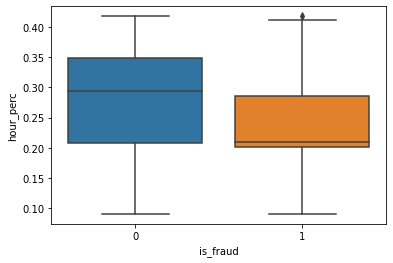

In [118]:
sns.boxplot(x='is_fraud', y='hour_perc', data=cc_df)
plt.show()

#x축: is_fraud = 0 : 정상 / 1 : 사기
#y축: hour_perc -> 발생된 거래가 시간대 거래에서 차이하는 비율
#is_fraud가 1인 경우 중앙값 대비 분포가 위쪽으로 몰려 있음